In [ ]:
# Goal: put data into .png format for loading into colab
# New idea: start from the original image and use the rescaling and rotation to do your own 
# data augmentation

# of galaxies 765


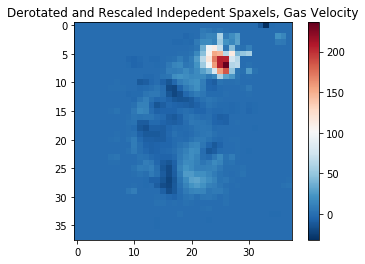

8997-12702.fits
8600-12701.fits
8555-12703.fits
8933-6102.fits
8597-12704.fits
7962-12701.fits
8262-12703.fits
8255-12703.fits
8625-12702.fits
8458-12702.fits
8147-12702.fits
8937-3702.fits
8946-12703.fits
8329-12704.fits
8945-6104.fits
7815-12704.fits
9509-12704.fits
8466-9101.fits
9038-12705.fits
8465-12705.fits
8618-12705.fits
8949-1901.fits
9183-12704.fits
9037-12703.fits
9000-12703.fits
8250-12702.fits
9869-12705.fits
8253-1901.fits
8456-12701.fits
8326-12702.fits
8249-12703.fits
8145-1902.fits
8999-12701.fits
9870-12704.fits
8992-12703.fits
9485-12705.fits
8550-12702.fits
8717-6102.fits
7975-12703.fits
8078-12702.fits
7968-3703.fits
8938-12703.fits
9035-12705.fits
8615-12705.fits
8447-3701.fits
8252-12704.fits
8484-12703.fits
8990-12705.fits
8084-3702.fits
8940-12701.fits
7990-12701.fits
7958-12701.fits
7964-12703.fits
8462-12702.fits
8727-3704.fits
8258-12703.fits
8455-12702.fits
8999-6102.fits
8447-12701.fits
8941-12704.fits
8241-12702.fits
8312-12701.fits
8153-12703.fits
8936-

8259-12703.fits
8486-1901.fits
8940-12704.fits
8547-9101.fits
9035-3702.fits
8940-6102.fits
8326-3703.fits
9039-1902.fits
8977-12704.fits
8313-12701.fits
9490-3702.fits
8995-6101.fits
7990-12704.fits
9876-6104.fits
9034-12705.fits
7958-12704.fits
8591-12703.fits
8623-12705.fits
8991-12705.fits
8447-12704.fits
8941-12701.fits
8932-6101.fits
8603-6102.fits
8567-1901.fits
9486-12703.fits
8995-12701.fits
8945-12705.fits
8602-12702.fits
7972-12701.fits
9865-12705.fits
8451-12703.fits
8333-12703.fits
9512-9102.fits
8145-12701.fits
9088-12702.fits
8317-12705.fits
9028-12705.fits
8439-12704.fits
8466-3704.fits
9031-12704.fits
8462-3701.fits
8144-12704.fits
8626-12704.fits
9883-12704.fits
8611-12704.fits
8466-6101.fits
8551-12705.fits
8938-12701.fits
7495-12705.fits
9883-3703.fits
8718-3701.fits
8948-12702.fits
8309-12704.fits
9036-12704.fits
8450-9101.fits
7992-12705.fits
8996-9101.fits
7443-9102.fits
8726-12702.fits
7975-12701.fits
8992-12701.fits
9085-12705.fits
8942-12705.fits
8249-12701.fi

In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
from PIL import Image
# There has gotta be a faster way to just reload a couple of galaxies
# This will yield a tuple for each subdirectory. Ths first entry in the 3-tuple is a directory name, so:

plates = os.listdir('/Users/beckynevin/CfA_Code/Kinematic_ML/data/kin_maps_derotated_and_rescaled/')
#plates_e = os.listdir('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps_e/')

#[x[0] for x in os.walk('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps/')]
#print('plates',plates)
print('# of galaxies', len(plates))



number = 14

# import test to get shape
im = pyfits.open('/Users/beckynevin/CfA_Code/Kinematic_ML/data/kin_maps_derotated_and_rescaled/'+str(plates[0]))[number-1].data

file = pyfits.open('/Users/beckynevin/CfA_Code/Kinematic_ML/data/kin_maps_derotated_and_rescaled/'+str(plates[0]))[0].header
#print(file)
plt.clf()
plt.imshow(im, cmap='RdBu_r')
plt.title(file['EXT'+str(number)])
plt.colorbar()
plt.show()



shape = np.shape(im)[0]
map_array_ml = np.zeros((len(plates),shape, shape))#np.zeros((len(plateifu_list),74**2))
map_array_ml_e = np.zeros((len(plates),shape, shape))#np.zeros((len(plateifu_list),74**2))

ifu_name=[]

counter=0


r_eff_list=[]

for j in range(len(plates)):
    #initial_split = str((re.split('_',plates[j]))[2])
    print(plates[j])
    ifu_1 = re.split('-',(plates[j]))[0]
    
    try:
        ifu_2_split = re.split('-',(plates[j]))[1]
    except IndexError:
        # This means its not a file we want
        continue
    ifu_2 = re.split('.f',(ifu_2_split))[0]
    
    ifu_name.append(str(ifu_1)+'-'+str(ifu_2))
    
    mapit = pyfits.open('/Users/beckynevin/CfA_Code/Kinematic_ML/data/kin_maps_derotated_and_rescaled/'+str(plates[j]))[number-1].data
    
    
    
    map_array_ml[j,:,:] = mapit
    
    '''mapit_e = pyfits.open('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps_derotated_and_rescaled/'+str(plates[j]))[1].data
    map_array_ml_e[j,:] = np.reshape(mapit_e,(shape**2))
    # I think 'reff' is actually in arcsec 0.5"/pixel
    
    r_eff_list.append(2*float(pyfits.open('/Users/beckynevin/CfA_Code/Kinematic_ML/kin_maps/'+str(plates[j]))[0].header['REFF']))
    #existing_plateifus.append(str(re.split('/',plates[j])[-2])+'-'+str(re.split('/',plates[j])[-1]))'''
print(ifu_name)

### Implement a PCA to play with how reducing the data might help you (in dimensions)
It's important to first standardize data in PCA

In [3]:
print(np.shape(map_array_ml))

(765, 38, 38)


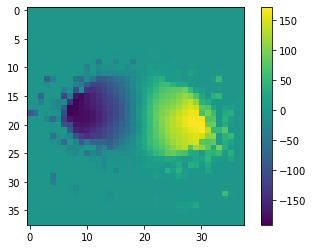

In [4]:
plt.imshow(map_array_ml[1])
plt.colorbar()
plt.show()

In [5]:
# I need to normalize

In [7]:
# Maybe unflatten it first?


data = map_array_ml#np.reshape(map_array_ml,(np.shape(map_array_ml)[0],shape,shape))
n_galaxies = np.shape(data)[0]#np.shape(map_array_ml)[0]


MB_matrix = np.zeros(( np.shape(data)[0],data[0,:,:].size))
for i in range(np.shape(data)[0]):
    MB_array = data[i,:,:].flatten()
    MB_arrayStd = 100*(MB_array - MB_array.mean())/MB_array.std()+100
    MB_matrix[i,:] = MB_arrayStd

/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


select this many 76
(765, 38, 38)


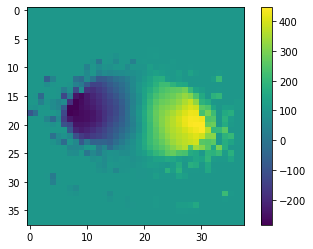

IndexError: list index out of range

In [14]:
# Okay you need to make a separate test and training set here, divide by 10/90
import random

n = int(0.1*len(ifu_name))
print('select this many', n)

test_set_names = random.sample(ifu_name, n) 



MB_matrix_normalized = np.reshape(MB_matrix,(np.shape(data)[0], np.shape(data)[1], np.shape(data)[2]))

print(np.shape(MB_matrix_normalized))
plt.clf()
plt.imshow(MB_matrix_normalized[1])
plt.colorbar()
plt.show()

for j in range(np.shape(data)[0]):
    im = Image.fromarray(MB_matrix_normalized[j])
    im = im.convert("L")
    if ifu_name[j] in test_set_names:
        os.system('mkdir /Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/test/'+str(ifu_name[j]))
        im.save("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/test/"+str(ifu_name[j])+"/"+str(j)+".png", format='PNG')
    else:
        os.system('mkdir /Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/train/'+str(ifu_name[j]))
        im.save("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/train/"+str(ifu_name[j])+"/"+str(j)+".png", format='PNG')

(765, 38, 38)


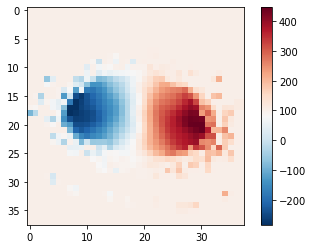

IndexError: list index out of range

In [16]:
# Try saving instead as color images:
# Okay you need to make a separate test and training set here, divide by 10/90
MB_matrix_normalized = np.reshape(MB_matrix,(np.shape(data)[0], np.shape(data)[1], np.shape(data)[2]))

print(np.shape(MB_matrix_normalized))
plt.clf()
plt.imshow(MB_matrix_normalized[1], cmap='RdBu_r')
plt.colorbar()
plt.show()

for j in range(np.shape(data)[0]):
    #im = Image.fromarray(MB_matrix_normalized[j])
    #im = im.convert("L")
    #os.system('mkdir /Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/test/'+str(ifu_name[j]))
    plt.imsave("/Users/beckynevin/CfA_Code/Kinematic_ML/data/pngs/all_Galzoo/"+str(ifu_name[j])+".png", 
               data[j], cmap='RdBu_r')
    